In [1]:
import sys
sys.path.insert(0,'..')

In [53]:
import numpy as np
import pandas as pd
import matplotlib as plt
import glob
from scipy import stats
from Src.Utils.utils import *
from Environments.Gridworld_687 import Gridworld_687
from Src.Utils.Basis import OneHot_Basis
from Src.Algorithms.Reward.RewardFunc import RewardFunc
from Src.Algorithms.Gamma.GammaFunc import GammaFunc
import plotly.graph_objects as go

In [24]:
# GW, or MC
env_type = "GW"
print("Env Type ", env_type)

Env Type  GW


In [34]:
class WeakConfig:
    def __init__(self):
        self.env = None
        self.basis = None

In [81]:
dir_path = "our_method/models"
aux_id = 1
model_percentage = 1
if env_type == "GW":
    print("Gridworld")    
    env = Gridworld_687()
    
    config = WeakConfig()
    config.env = env
    
    
    basis = OneHot_Basis()
    basis.init(config)
    config.basis = basis
    
    width = env.width
    
    path = f"{dir_path}/{aux_id}"
    r_path = f"{path}/Reward_Model_1"
    g_path = f"{path}/Gamma_Model_1"
    
    r_func = RewardFunc()
    r_func.init(config)
    g_func = RewardFunc()
    g_func.init(config)
    
    r_func.load_state_dict(torch.load(r_path))
    g_func.load_state_dict(torch.load(g_path))
    
    X = []
    Y = []
    R = []
    G = []
    
    offsets = env.action_state_offset
    scale = 1/4
    for key in offsets.keys():
        offsets[key] = offsets[key].astype(float) * scale

    
    for y in range(width):
        for x in range(width):
            pos = torch.tensor([[x,y]])
            onehot = basis(pos)
            for a_idx in range(env.action_space.n):
                a = torch.zeros(1,env.action_space.n)
                a[0,a_idx] = 1
                
                r = r_func(pos, onehot, action = a)
                g = g_func(pos, onehot, action = a)
                
                cur_offsets = offsets[a_idx]
                
                X.append(x + cur_offsets[0])
                Y.append(y + cur_offsets[1])
                R.append(r[0].detach().numpy())
                G.append(g[0].detach().numpy())
                
            
            
            


Gridworld
INITIALIZE REWARD FUNCTION
INITIALIZE REWARD FUNCTION


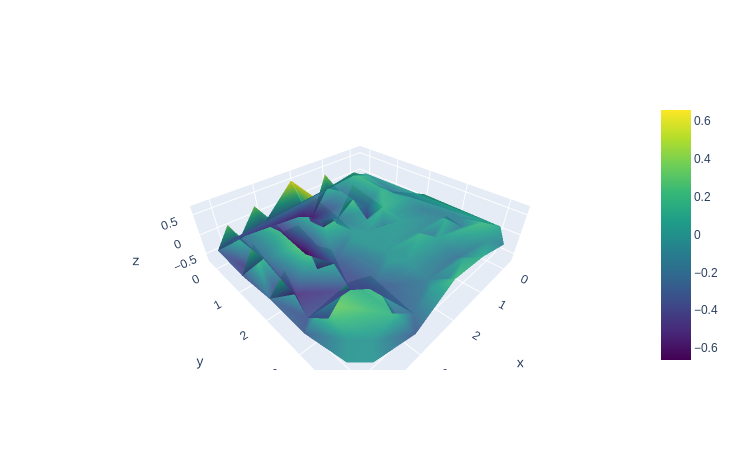

In [82]:
fig = go.Figure(data=[go.Mesh3d(x=X, y=Y, z=R, opacity=0.9, intensity=R, colorscale='Viridis')])
fig.show()